# TP2: Regresión del valor de valor medio de casas en distritos de California

Se requiere construir una regresión que nos permita predecir el valor medio de las casas en distritos de California, EEUU (medidos en cientos de miles de dólares $100,000). Este dataset se deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Los atributos, en el orden en que se guardaron en el dataset, son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

Y el target es:

- `MedHouseVal`: Mediana del costo de casas en el bloque (en unidades de a $100.000)

Para este TP, se proporciona una notebook (`ayuda.ipynb`) con la lectura del dataset, la separación de los datos, entre 
otras ayudas para resolver este trabajo práctico.

## Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación 
lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o 
directamente graficar usando un mapa de calor.
2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se 
observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin 
entrar en pruebas de hipótesis?
3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del 
modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su 
respuesta.
4. Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.
5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el 
mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$.
6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 
¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse 
reducido?

El entregable consiste en uno o más archivos de notebook `ipynb` con las respuestas. Aunque se da libertad para usar 
otros tipos de entregables, es importante incluir tanto el código de lo resuelto como las respuestas. Pueden subir 
el contenido o proporcionar un enlace a un repositorio público (GitHub o GitLab) con el contenido en el aula virtual. 
**No olviden especificar los autores del TP en el entregable**.

Para resolver este TP, son libres de utilizar los recursos que consideren necesarios. Pueden hacerlo en cualquier 
lenguaje de programación y de la forma que consideren apropiada.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge
sns.set()

In [2]:
# Download california bunch
california_bunch = fetch_california_housing()


In [25]:
california_dataframe = pd.DataFrame(np.c_[california_bunch['data'] ,california_bunch['target']], columns=california_bunch['feature_names']+california_bunch['target_names'])

X = pd.DataFrame(california_bunch['data'], columns=california_bunch['feature_names'])
y = pd.Series(california_bunch['target'], name=california_bunch['target_names'][0])
california_dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


1.Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación 
lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o 
directamente graficar usando un mapa de calor.

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Name: MedHouseVal, dtype: float64


<Axes: >

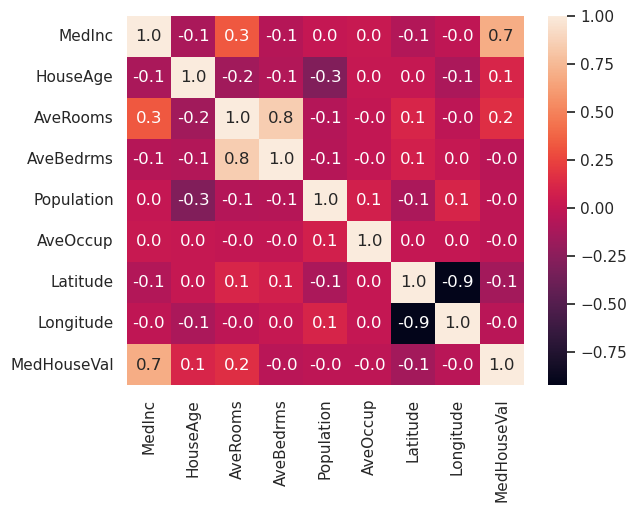

In [5]:
# Correlation
california_correlation = california_dataframe.corr()
california_correlation_with_target = california_correlation['MedHouseVal'].drop('MedHouseVal')
print(california_correlation_with_target)
sns.heatmap(california_correlation, annot=True, fmt=".1f")

Del la lectura del mapa de calor, se observa que el atributo con mayor correlación con el target (MedHouseVale), es MedInc.
A su vez, AveRooms y AveBedrms son los atributos que parecería estar más correlacionados. 

2.Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se 
observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin 
entrar en pruebas de hipótesis?

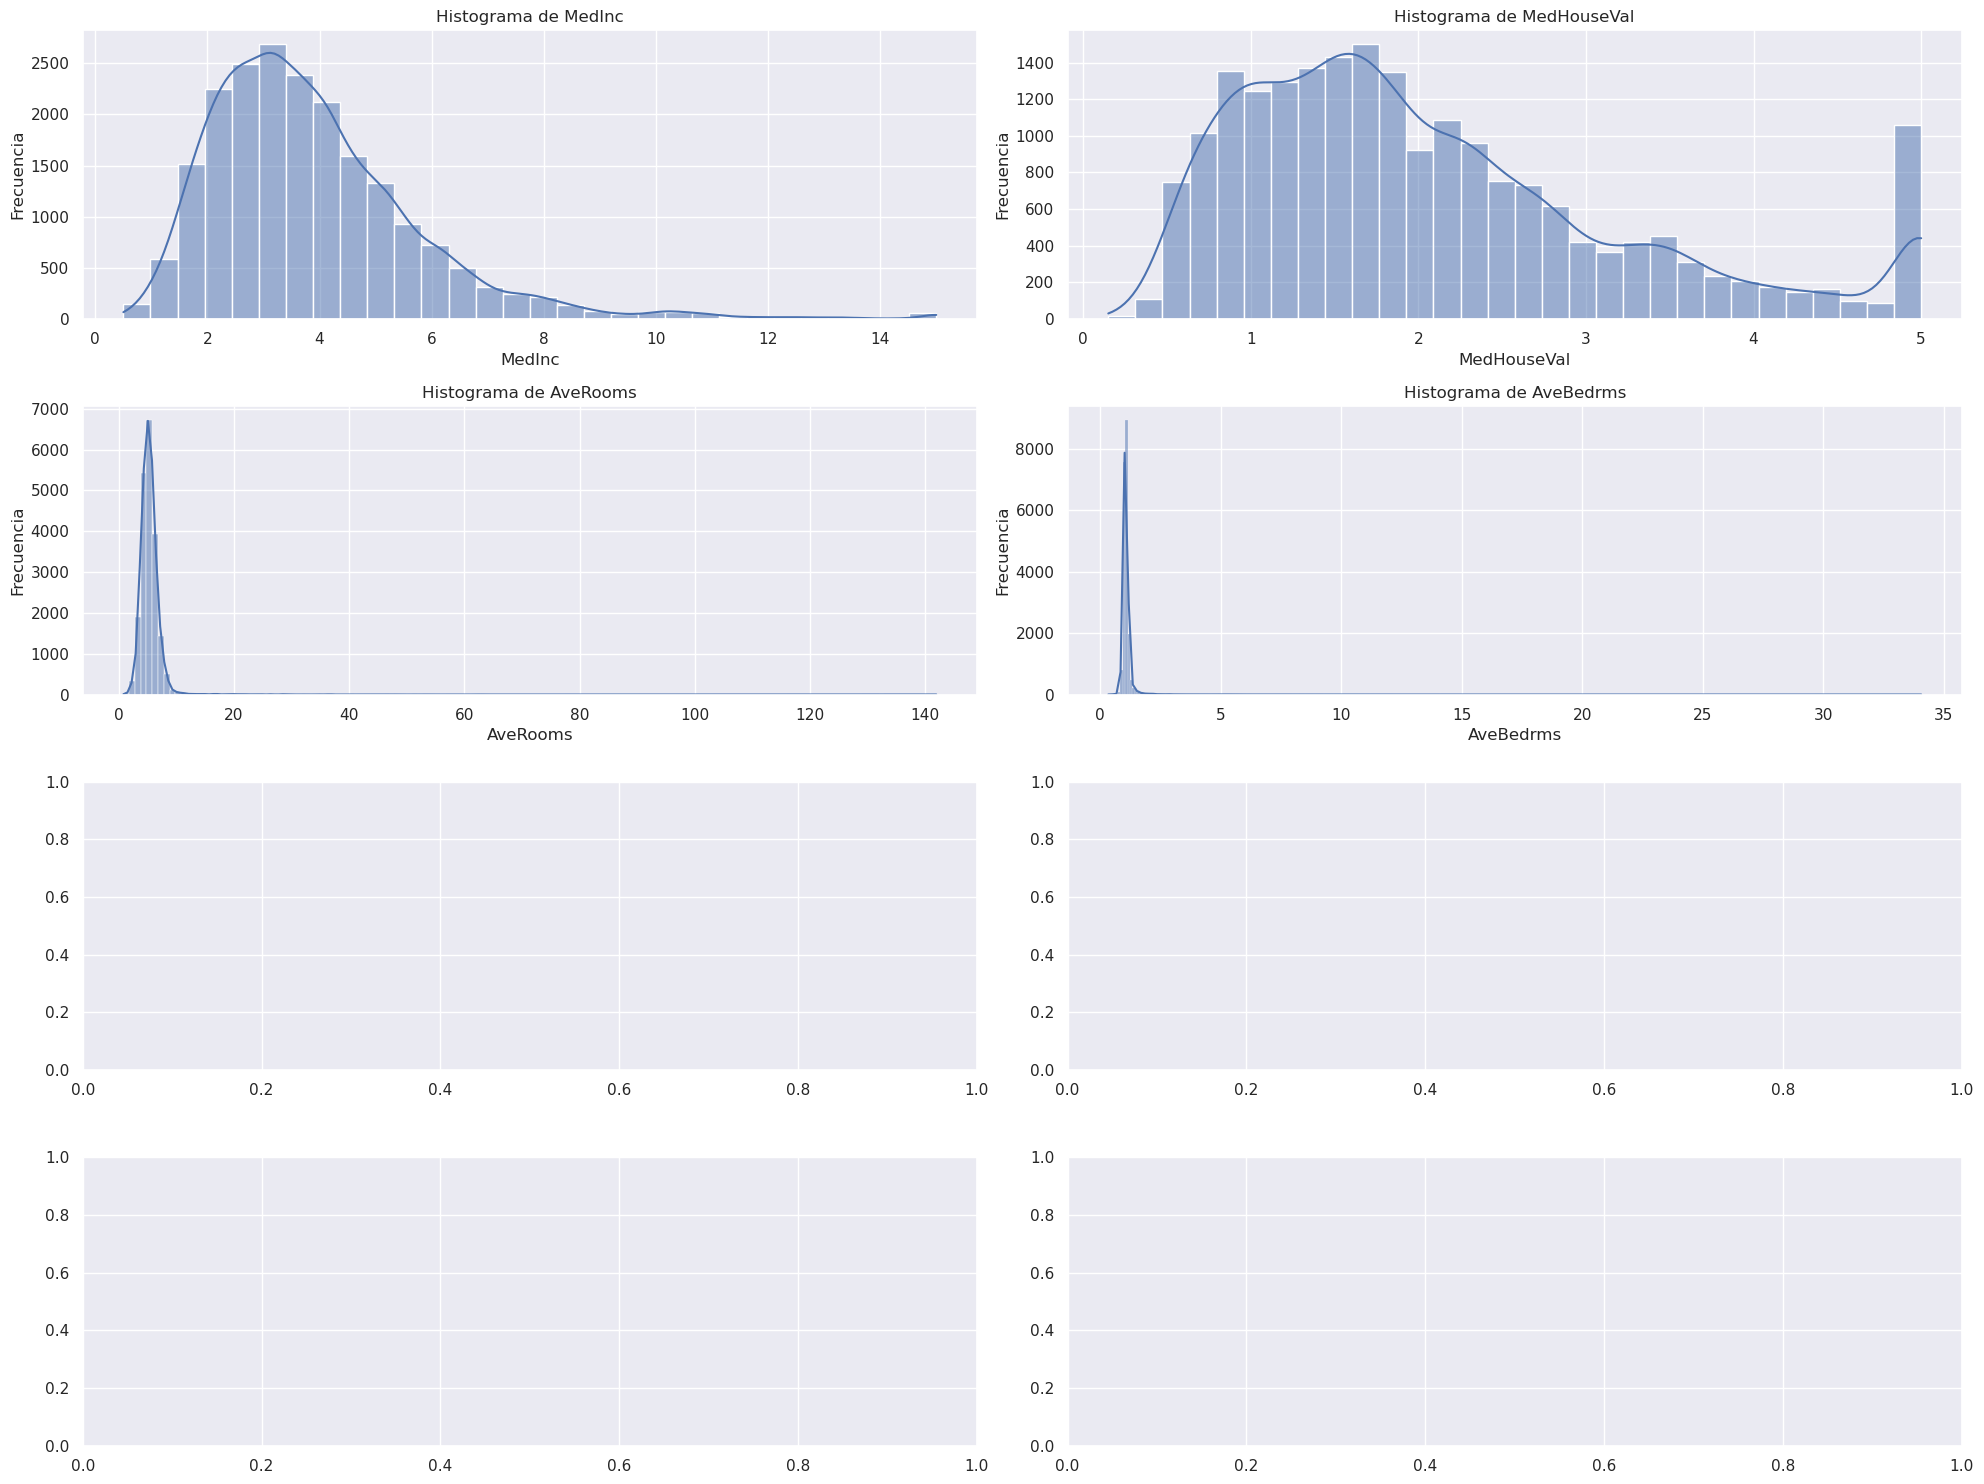

In [42]:
ncols = len(california_dataframe.columns)//4
nrows=4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Histograma

def histo_graph(col, x, y, bins=30, binwidth=None):
    sns.histplot(california_dataframe[col], bins=bins, binwidth=binwidth, kde=True, ax=axes[x][y])
    axes[x][y].set_title(f'Histograma de {col}')
    axes[x][y].set_xlabel(col)
    axes[x][y].set_ylabel('Frecuencia')
    
# MedInc 
histo_graph('MedInc', 0, 0, 30)
# MedHouseValue
histo_graph('MedHouseVal', 0, 1, 30)
# AveRooms
histo_graph('AveRooms', 1, 0, 10, 1)
# AveBedrms
histo_graph('AveBedrms', 1, 1, 5, 0.1)

plt.tight_layout()
plt.show()

In [16]:
california_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [39]:
kmeans = KMeans(n_clusters=10, random_state=0)
california_dataframe['cluster'] = kmeans.fit_predict(california_dataframe[['Latitude', 'Longitude']])

los_angeles_coords = np.array([-118.2437, 34.0522])
california_dataframe['distance_to_LA'] = pairwise_distances(california_dataframe[['Longitude', 'Longitude']], [los_angeles_coords]).flatten()

/home/l30659/miniconda3/envs/conda3_11/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
california_dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,distance_to_LA
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,156.333031
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,156.322780
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,156.343283
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,156.353536
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,156.353536
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,8,155.168307
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,8,155.290533
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,8,155.300723
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,8,155.402652


MedInc            0.688075
HouseAge          0.105623
AveRooms          0.151948
AveBedrms        -0.046701
Population       -0.024650
AveOccup         -0.023737
Latitude         -0.144160
Longitude        -0.045967
cluster          -0.084163
distance_to_LA    0.045811
Name: MedHouseVal, dtype: float64


<Axes: >

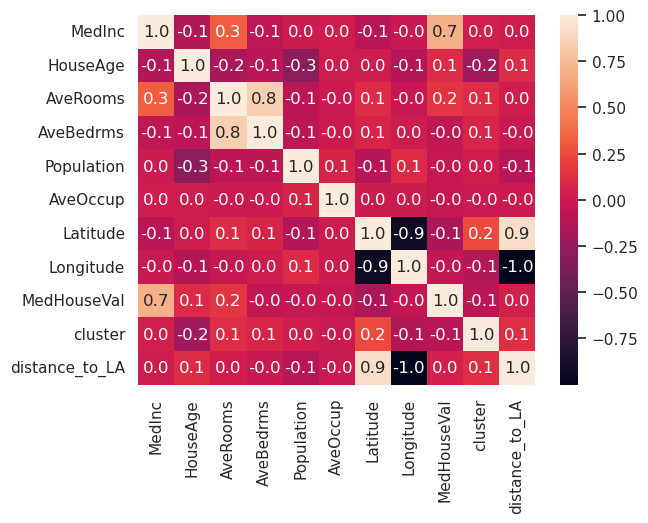

In [41]:
# Correlation
california_correlation = california_dataframe.corr()
california_correlation_with_target = california_correlation['MedHouseVal'].drop('MedHouseVal')
print(california_correlation_with_target)
sns.heatmap(california_correlation, annot=True, fmt=".1f")

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [47]:
california_dataframe['latitude_rad'] = np.radians(california_dataframe['Latitude'])
california_dataframe['longitude_rad'] = np.radians(california_dataframe['Longitude'])
california_dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster,distance_to_LA,latitude_rad,longitude_rad,coordinates
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,156.333031,0.661131,-2.133316,"(0.6611307206554521, -2.133315944712669)"
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1,156.322780,0.660782,-2.133141,"(0.6607816548050531, -2.1331414117874696)"
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,156.343283,0.660607,-2.133490,"(0.6606071218798537, -2.1334904776378685)"
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,156.353536,0.660607,-2.133665,"(0.6606071218798537, -2.133665010563068)"
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,156.353536,0.660607,-2.133665,"(0.6606071218798537, -2.133665010563068)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,8,155.168307,0.689056,-2.113419,"(0.6890559886873613, -2.1134191912399336)"
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,8,155.290533,0.689231,-2.115514,"(0.6892305216125608, -2.1155135863423267)"
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,8,155.300723,0.688183,-2.115688,"(0.6881833240613642, -2.115688119267526)"
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,8,155.402652,0.688183,-2.117433,"(0.6881833240613642, -2.1174334485195203)"


In [55]:
california_dataframe['coordinates'] = list(zip(california_dataframe['latitude_rad'], california_dataframe['longitude_rad']))
coordinates = np.vstack((california_dataframe['latitude_rad'], california_dataframe['longitude_rad'])).T
distance_matrix = haversine_distances(coordinates, coordinates)

In [ ]:
epsilon = 5  # Distancia máxima entre dos muestras para ser consideradas vecinas
min_samples = 10  # Número mínimo de muestras en un vecindario
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='precomputed')
dbscan.fit(distance_matrix)

# Obtener las etiquetas de los clusters y el número de clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Restar 1 para ignorar el ruido (-1)
print(f'Número de clusters: {n_clusters}')